In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

content = np.array([])

driver = webdriver.Chrome("D:\Accenture\Second Half\chromedriver_win32\chromedriver.exe")
driver.get("https://inform.tmforum.org/tag/ai-data-insights/")

article_links = []

for j in range(1,8):
    driver.get(f"https://inform.tmforum.org/tag/ai-data-insights/page/{j}/")
    articles = driver.find_elements_by_class_name("article-item__title-link")
    # print(articles)
    for i in articles:
        article_links.append(i.get_attribute("href"))

text = []

for i in article_links:
    driver.get(i)
    try:
        WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, "post_title"))
    )
        # text.append(driver.find_element_by_class_name("post_title").text)
        text.append(driver.find_element_by_class_name("content").text)
    except:
        pass

content = np.array(text)

print(content)

['This article was written by members of TM Forum’s Closed-loop Anomaly Detection and Resolution Automation project. Authors include: Tayeb Ben Meriem, Senior Standards Manager, Orange  Emmanuel Otchere, Chief Architect, Huawei; Amandeep Singh, Technology Architect, IBM; Sharath Prasad, Data Scientist IBM; Utpal Mangla, VP & Senior Partner, IBM.\nThis is the third blog in the series from the TM Forum Closed-loop Anomaly Detection and Resolution Automation (CLADRA) project. The first blog covered how closed-loop management can help communications service providers (CSPs) tackle network challenges and improve customer experience. The second blog covers closed-loop Patterns with focus on OODA (Observe-Orient-Decide-Act) approach and shares logical architecture and it’s mapping to OODA layers.\nThis third blog covers the core processes dealing with data and AI Models as part of CLADRA Logical Architecture and the way it is mapped with AI closed-loop-driven ODA (Open Digital Architecture) a

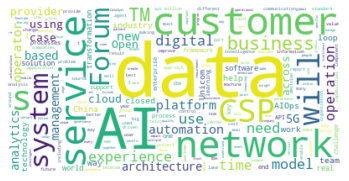

In [2]:
str = ','.join(text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
from gensim.parsing.preprocessing import remove_stopwords
t1 = remove_stopwords(str)

# print(t1)
t1 = t1.lower()
remove_digits = 1
pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
import re
t1 = re.sub(pattern, '', str)

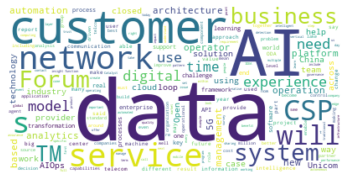

In [6]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(str)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
